# Import Statements

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [4]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

#### This is used to show the shape of the dataset


In [5]:
data.shape

(5391, 6)

#### This is used check if there are any null values in the dataset

In [6]:
print(f'Are there any null values in the dataset: {data.isna().values.any()}')

Are there any null values in the dataset: False


#### This is used to check if there are any duplicated values in the dataset

In [7]:
print(f'Are there any duplicated values in the dataset: {data.duplicated().values.any()}')

Are there any duplicated values in the dataset: False


In [8]:
print(data.dtypes)

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [14]:
chars = ['$', ',']
columns = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

for column in columns:
  for char in chars:
    data[column] = data[column].astype(str).str.replace(char, "")

  data[column] = pd.to_numeric(data[column])

data.dtypes



<ipython-input-14-7b806299b61c>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[column] = data[column].astype(str).str.replace(char, "")


Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [15]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.sample(15)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3017,2072,2007-11-21,August Rush,25000000,66015869,31664162
907,1720,1996-09-20,The First Wives Club,30000000,181489203,105489203
5309,251,2017-01-13,Monster Trucks,125000000,61681268,33370166
4659,750,2014-08-22,Sin City: A Dame to Kill For,65000000,39499349,13757804
298,3143,1981-06-11,Time Bandits,12000000,37400000,37400000
100,2827,1962-12-16,Lawrence of Arabia,15000000,69995385,37495385
2422,5350,2005-04-29,Funny Ha Ha,30000,82698,77070
4693,1891,2014-10-10,"Alexander and the Terrible, Horrible, No Good,...",28000000,101379287,66954149
3775,1806,2010-11-19,The Next Three Days,30000000,67255916,21148651
5282,1965,2016-11-23,Rules Don’t Apply,26700000,3871448,3652206


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

#### Finding the average production budget


In [16]:
round(data.USD_Production_Budget.mean(),2)

31113737.58

#### Average worldwide gross revenue


In [17]:
round(data.USD_Worldwide_Gross.mean(), 2)

88855421.96

In [18]:
data.sort_values(by='USD_Production_Budget', ascending=True, inplace=True)
print(f'The minimum for worldwide revenue is 0 and the minimum for domestic revenue is 0.')



The minimum for worldwide revenue is 0 and the minimum for domestic revenue is 0.


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [19]:
grossed_zero = data[data.USD_Domestic_Gross == 0]
grossed_zero

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
...,...,...,...,...,...,...
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0


In [20]:
print(f'There are a total of {grossed_zero.shape[0]} films that grossed domestically, The highest grossing film was Singularity')

There are a total of 512 films that grossed domestically, The highest grossing film was Singularity


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

### Filtering on Multiple Conditions

In [21]:
inter = data.query('USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0')
print(f'The number of movies that made money internationally but not domestic would be {inter.shape[0]}')

The number of movies that made money internationally but not domestic would be 155


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [24]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [28]:
future_releases = data[data.Release_Date >= scrape_date]
data_clean = data.drop(future_releases.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

# Seaborn for Data Viz: Bubble Charts

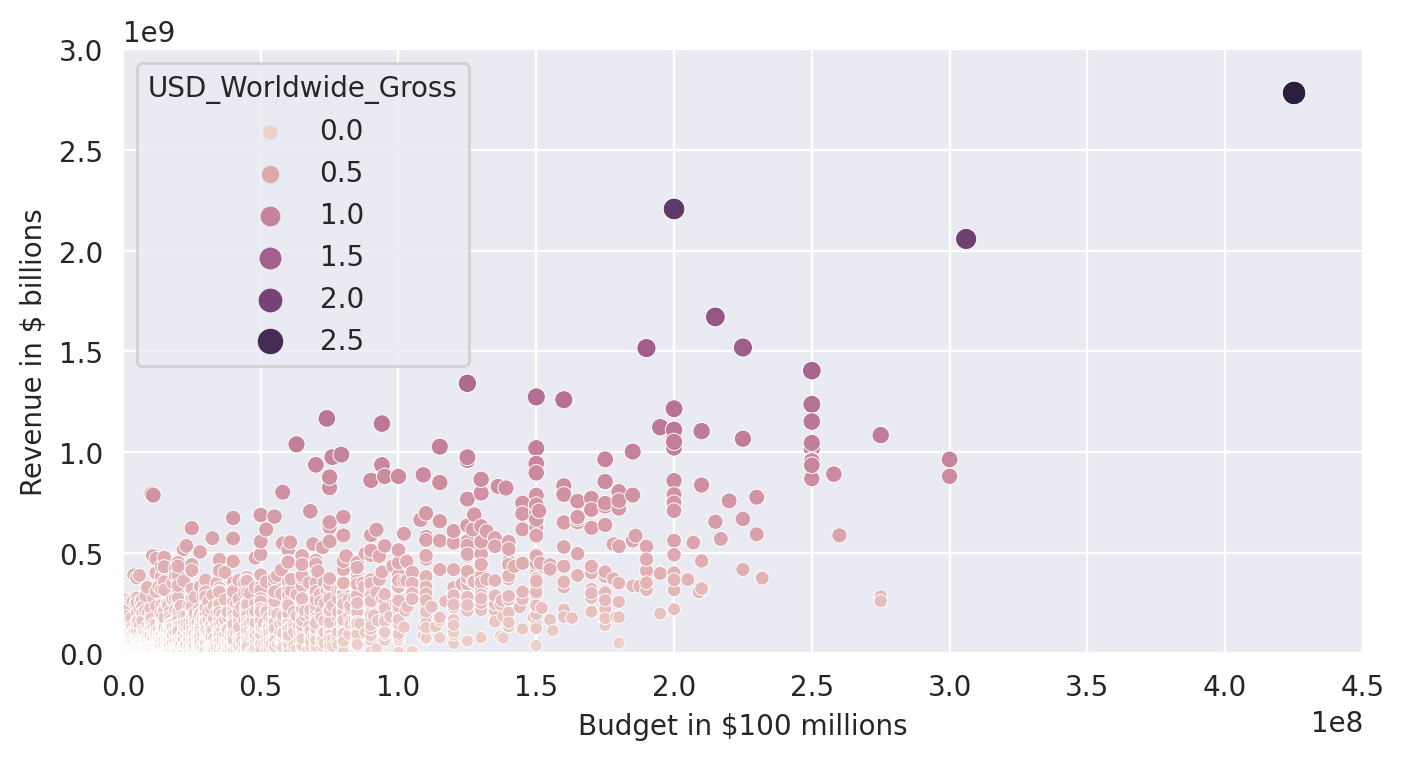

In [32]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean, x='USD_Production_Budget',
                  y='USD_Worldwide_Gross',
                  hue='USD_Worldwide_Gross',
                  size='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



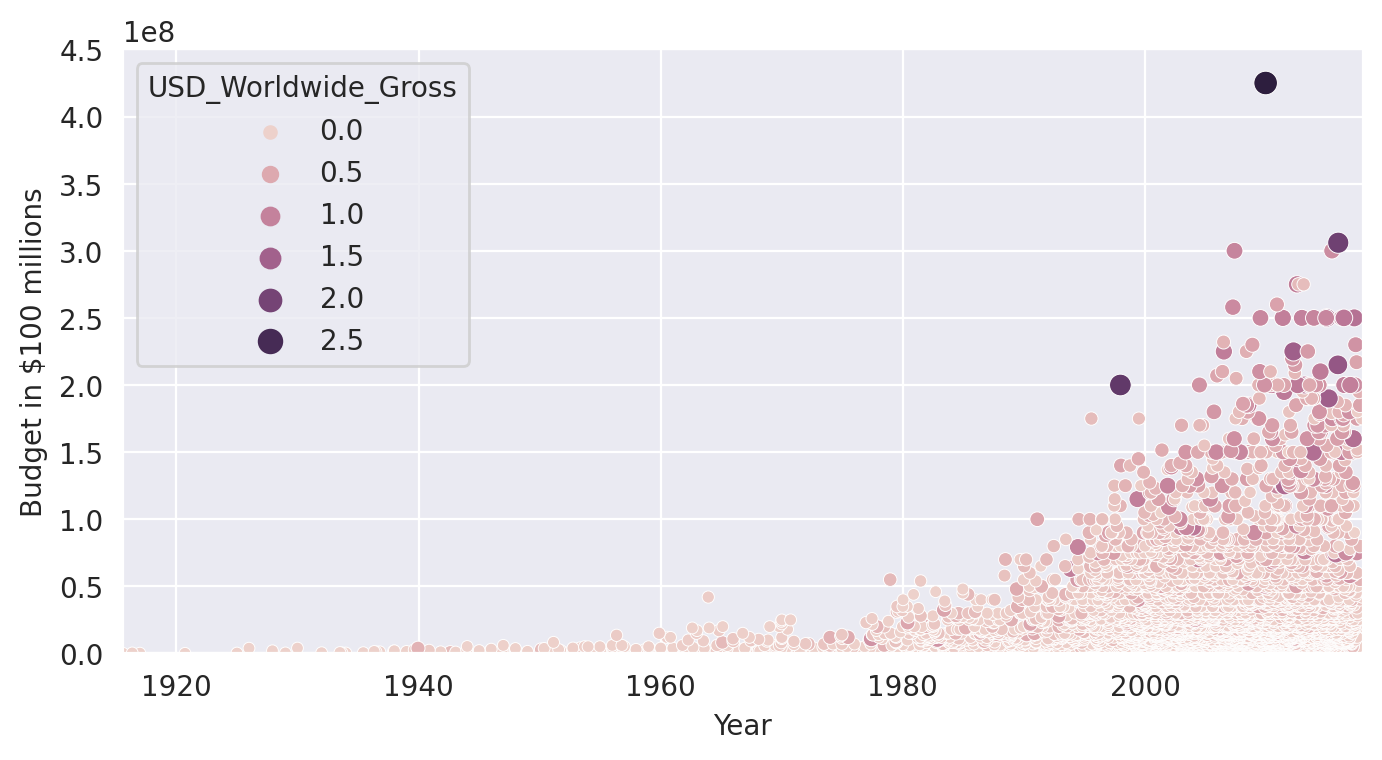

In [41]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='Release_Date',
                       y='USD_Production_Budget',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
  
  ax.set(ylim=(0, 450000000),
         xlim = (data_clean.Release_Date.min(), data_clean.Release_Date.max()),
         xlabel='Year',
         ylabel='Budget in $100 millions')


plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [43]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year
decades = years//10*10
data_clean['Decade'] = decades

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [45]:
old_films = data_clean[data_clean.Decade < 1970]
new_films = data_clean[data_clean.Decade >= 1970]

print(f'There have been {old_films.shape[0]} old movies and the most expensive one was {old_films.USD_Production_Budget.max()}')

There have been 153 old movies and the most expensive one was 42000000


# Seaborn Regression Plots

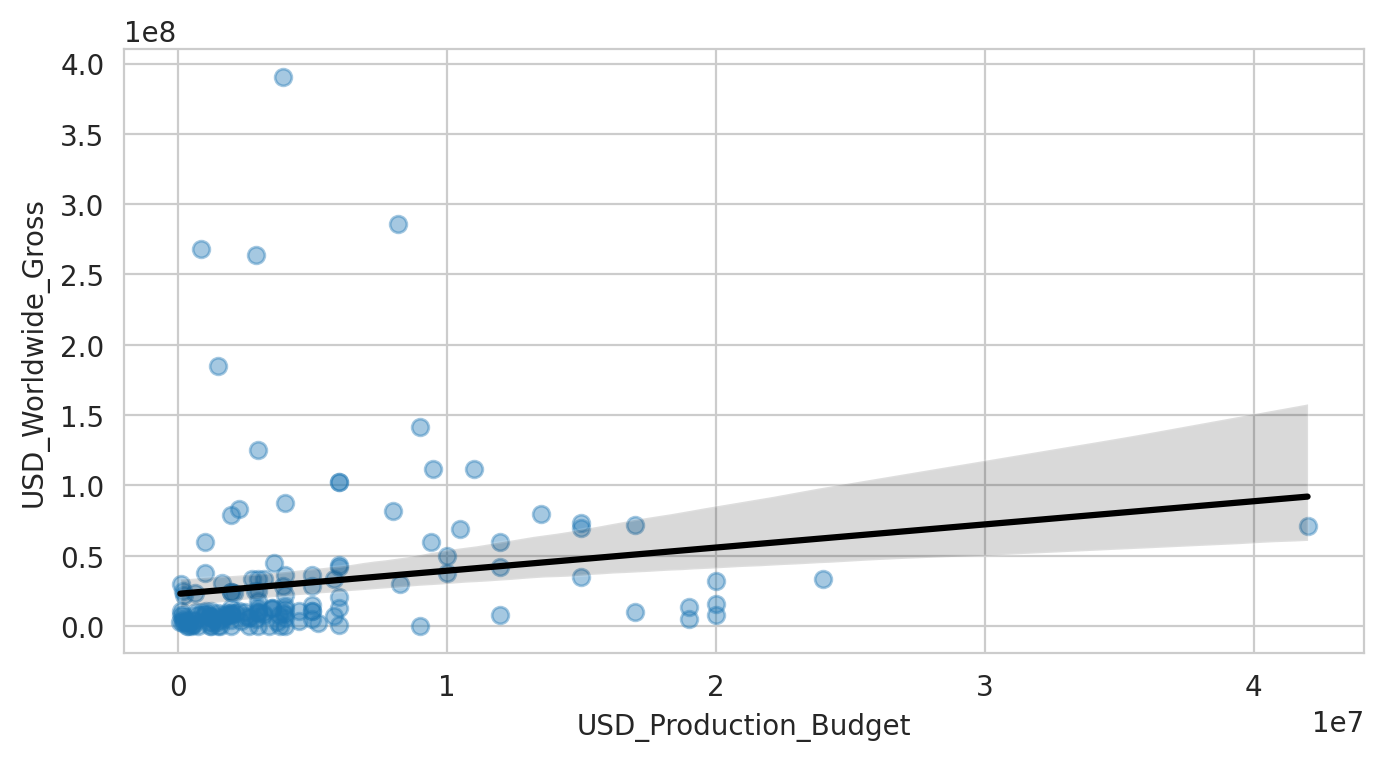

In [47]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

plt.show()

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

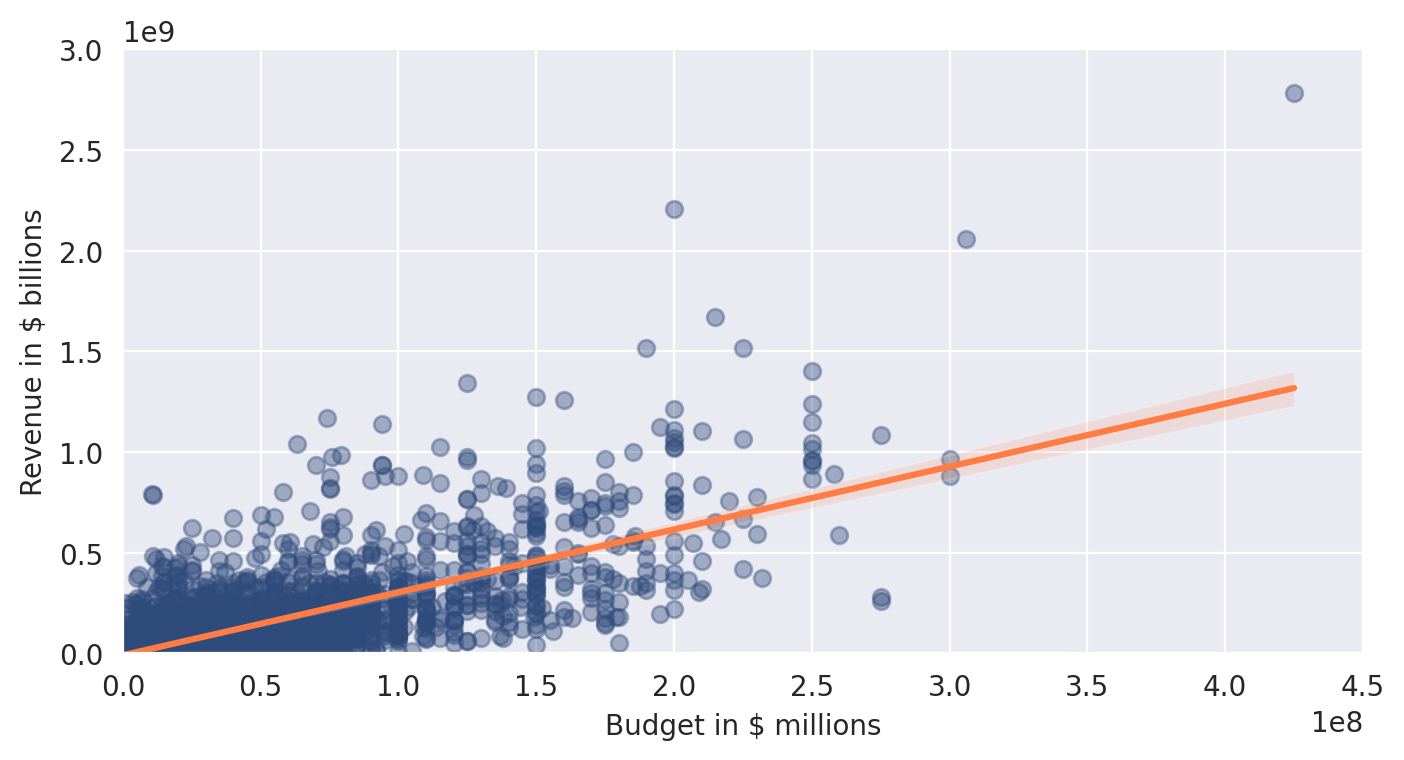

In [51]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            color = '#2f4b7c',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': '#ff7c43'})
  
  ax.set(xlim=(0, 450000000),
         ylim = (0, 3000000000),
         xlabel = 'Budget in $ millions',
         ylabel = 'Revenue in $ billions')

plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [58]:
regression = LinearRegression()

# feature variable
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

#Target variable
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

#find the best fit line
regression.fit(X,y)

#checking how well the model fits the data
regression.score(X,y)

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [61]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(X,y)
regression.score(X,y)

0.02937258620576888

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 